# PGM PyLib: A Toolkit for Probabilistic Graphical Models in Python
### Authors: Jonathan Serrano-Perez - L. Enrique Sucar

 From: Instituto Nacional de Astrofísica, Óptica y Electrónica, Puebla, Mexico

PGM PyLib is a toolkit that contains a wide range of Probabilistic Graphical Models algorithms implemented in Python, and serves as a companion of the book Probabilistic Graphical Models: Principles and Applications. Currently, the algorithms implemented include: Bayesian classifiers, hidden Markov models, Markov random fields, and Bayesian networks; as well as some general functions. The toolkit is open source, can be downloaded from: https://github.com/jona2510/PGM_PyLib .


## Presented by Edison Bejarano Universitat Politècnica de Catalunya, Spain - 2022

## 1. EXAMPLE OF A BAN CLASSIFIER
An example of how to use the BAN classifier is presented. 
1. First of all, it is required to import the package which contains the classifier.



In [11]:
# Example of a BAN classifier in Python
import numpy as np
import PGM_PyLib.augmented as abc

In [12]:
# In this case we are considering a problem with 4 classes and 5 attributes. 

np.random.seed(0)   # it is not necessary
# Four classes
# 5 attributes

# 100 instances for training
data_train = np.random.randint(0,5,size=(100,5))
cl_train = np.random.randint(0,4,size=100)

In [ ]:
# Once the data is ready, the next step is to instantiate the classifier with its parameters
# 50 instances for testing

data_test = np.random.randint(0,5,size=(50,5))
cl_test = np.random.randint(0,4,size=50) 


# in this case, the structure is generated automatically, the smooth used for the estimations of 
# probabilities is 0.1 and the prior probabilities will be used in the prediction phase.

# create the classifiers 
c = abc.augmentedBC(algStructure="auto", smooth=0.1, usePrior=True)

In [14]:
#   Then, the classifier is trained with training data. 
# train the classifier
c.fit(data_train, cl_train)

#  Once the classifier is trained, it is used to predict the class of new instances.
# 
#  # predict 
p = c.predict(data_test)
# evaluation
print(c.exactMatch(cl_test, p))

#  Finally, an evaluation measure such as exact-match/accuracy 
# can be used to evaluated the performance of the classifier .
# ignore the Prior probabilities
c.usePrior = False
p = c.predict(data_test)        # predict
print(c.exactMatch(cl_test, p)) # evaluation




0.24
0.24


## 2.EXAMPLE OF HNN (Hidden Markov Model)
The package that contains the HMM is imported

1. The observation sequence is shown in line 9, and it is evaluated with the forward algorithm
2. the most probable sequence of states is obtained with the Viterbi algorithm

In [48]:
'''Hidden Markov Models (HMMs) can be seen as a double stochastic process, 
that is, a hidden stochastic process that we can not directly observe, and a 
second stochastic process that produces the sequence of observations given the 
first process. The toolkit includes algorithms to solve the following problems: 
evaluation - forward, state estimation -
 Viterbi, and learning - Baum-Welch.'''
 
import PGM_PyLib.HMM as hmm


In [19]:
states = ["M1", "M2"]
obs = ["H", "T"]
PI = np.array( [0.5, 0.5] )	#prior probabilities
A = np.array( [[0.5, 0.5], [0.5, 0.5]] ) #transition probabilities
B = np.array( [[0.8, 0.2], [0.2, 0.8]] ) #observation probabilities

# Inializating the model with all its parameters
h = hmm.HMM(states=states, observations=obs, prior=PI, transition=A, observation=B)

O = ["H","H","T","T"] # observation sequence

# evaluating an observation sequence
print("Score of: H,H,T,T")
print(h.forward(O))

# obtaining the most probable state at each time t
lmps = [h.MPS(i,O) for i in range(1, len(O)+1) ]
print("Most probable state at each time t:")
print(lmps)

# obtaining the most probable sequence of states
mpss,score = h.viterbi(O)
print("Most probable sequence of states:")
print(mpss)


Score of: H,H,T,T
0.0625
Most probable state at each time t:
['M1', 'M1', 'M2', 'M2']
Most probable sequence of states:
['M1', 'M1', 'M2', 'M2']


# 3. Example of Bayesian Networks

• Chow-Liu Procedure (CLP): it estimates the Mutual Information (MI) between each pair of variables, and uses the pairs of variables with the highest MI for building the skeleton of a tree. Directions of the arcs are given by selecting one variable as the root of the tree and assigning directions to the arcs starting from the root.

• CLP with Conditional Mutual Information (CLP-CMI): it follows the same principles than CLP, however, CMI is estimated for each pair of variables given a third, this last is an addi- tional variable that is used for all the CMI estimations.


## CLP - Bayesian Networks


In [46]:
import PGM_PyLib.structures.trees as trees

np.random.seed (0)  # it is not necessary

# 7 variables 
# 500 instances 
data = np.random.randint(0,4,size=(500,3))
data = np.concatenate([data, np.random.randint(2,6,size=(500,4))],axis=1)

# create a instance of CLP_MI
clp = trees.CLP_MI(root=0, heuristic=False, smooth=0.1)
# create the structure
structure = clp.createStructure(data)
# show structure
print(structure)
print()

# Use heuristic to automatically select the root of the tree
clp.heuristic = True
structure_clp = clp.createStructure(data)
#show structure
print(structure_clp)

#show the root node of the tree
print(clp.root)

[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0]]

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0]]
6


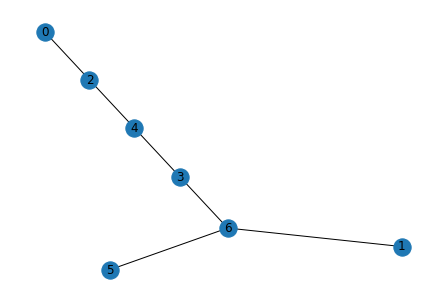

In [47]:
import networkx as nx
# If you can represent your network you can use netwroks module
G_clp = nx.from_numpy_matrix(structure_clp)
pos_clp = nx.kamada_kawai_layout(G_clp)
# draw the graph
nx.draw(G_clp, pos_clp, with_labels=True)

## CLP-CMI - Bayesian Networks

In [38]:
import PGM_PyLib.structures.trees as trees

np.random.seed (0)  # it is not necessary

# 7 variables 
# 500 instances 
data = np.random.randint(0,4,size=(500,3))
data = np.concatenate([data, np.random.randint(2,6,size=(500,4))],axis=1)
#aditional variable
z = np.random.randint(1,5,size=(500))

# create a instance of CLP_CMI
clp_cmi = trees.CLP_CMI(root=0, heuristic=False, smooth=0.1)
# create the structure
structure = clp_cmi.createStructure(data, z)
# show structure
print(structure)
print()

# Use heuristic to automatically select the root of the tree
clp_cmi.heuristic = True
structure_clp_cmi = clp_cmi.createStructure(data, z)
#show structure
print(structure_clp_cmi)

#show the root node of the tree
print(clp_cmi.root)


[[0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]]

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]
 [1 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
4


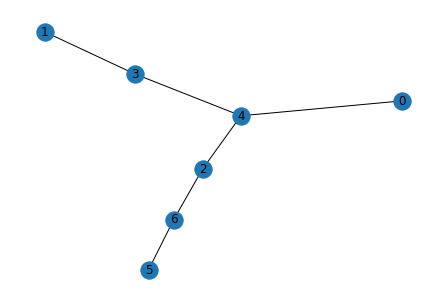

In [39]:
# If you can represent your network you can use netwroks module
G_cmi = nx.from_numpy_matrix(structure_clp_cmi)
pos = nx.kamada_kawai_layout(G_cmi)
# draw the graph
nx.draw(G_cmi, pos, with_labels=True)